# Decoding the Beats with Spotify

#### Team
`Akanksha`  
Individual Project  
I513 Usable AI, Spring 2025

#### Introduction
This project explores musical trends and audio feature patterns across 15,000+ classic hit songs using Spotify's API data. The goal is to analyze how music characteristics have evolved over time, uncover what defines a hit song, and build predictive models and a basic recommender system.

#### Source
https://www.kaggle.com/datasets/thebumpkin/10400-classic-hits-10-genres-1923-to-2023/data


## Getting Started

In [34]:
# importing libraries
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Loading the dataset
df_classic_hits = pd.read_csv('Datasets/classic-hits.csv')

# Data familiarization
df_classic_hits.head()

Track          Artist  Year  Duration  Time_Signature  \
0         Hey Jack Kerouac  10,000 Maniacs  1987    206413               4   
1         Like the Weather  10,000 Maniacs  1987    236653               4   
2  What's the Matter Here?  10,000 Maniacs  1987    291173               4   
3               Trouble Me  10,000 Maniacs  1989    193560               4   
4    Candy Everybody Wants  10,000 Maniacs  1992    185960               4   

   Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
0         0.616   0.511    6   -15.894     1       0.0279       0.03840   
1         0.770   0.459    1   -17.453     1       0.0416       0.11200   
2         0.593   0.816    9    -7.293     1       0.0410       0.00449   
3         0.861   0.385    2   -10.057     1       0.0341       0.15400   
4         0.622   0.876   10    -6.310     1       0.0305       0.01930   

   Instrumentalness  Liveness  Valence    Tempo  Popularity      Genre  
0          0.000000    0.1500    0.604  132.015          40  Alt. Rock  
1          0.003430    0.1450    0.963  133.351          43  Alt. Rock  
2          0.000032    0.0896    0.519   99.978          12  Alt. Rock  
3          0.000000    0.1230    0.494  117.913          47  Alt. Rock  
4          0.006840    0.0987    0.867  104.970          43  Alt. Rock

In [35]:
# Basic shape and info
print("Shape of dataset:", df_classic_hits.shape)

df_classic_hits.info()

Shape of dataset: (15150, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             15150 non-null  object 
 1   Artist            15150 non-null  object 
 2   Year              15150 non-null  int64  
 3   Duration          15150 non-null  int64  
 4   Time_Signature    15150 non-null  int64  
 5   Danceability      15150 non-null  float64
 6   Energy            15150 non-null  float64
 7   Key               15150 non-null  int64  
 8   Loudness          15150 non-null  float64
 9   Mode              15150 non-null  int64  
 10  Speechiness       15150 non-null  float64
 11  Acousticness      15150 non-null  float64
 12  Instrumentalness  15150 non-null  float64
 13  Liveness          15150 non-null  float64
 14  Valence           15150 non-null  float64
 15  Tempo             15150 non-null  float64
 16  Popularity

## Data Preprocessing & Cleaning

#### Summary

- There weren't any null values in the dataset.
- Cleaned and removed two rows with 0 tempo and time signature. 
- Checked the song with more than 10 mins song duration - looks like live concerts/recordings that were popular - not removing this. 
- Removed duplicate song entries 
- Removed 'Today' genre since it isn't a valid genre

In [36]:
# Null value check
df_classic_hits.isnull().sum()

Track               0
Artist              0
Year                0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Genre               0
dtype: int64

In [37]:
# checking for duplicates
df_classic_hits.duplicated().value_counts()

False    15149
True         1
Name: count, dtype: int64

In [38]:
df_classic_hits[df_classic_hits.duplicated(keep=False)]

Track Artist  Year  Duration  Time_Signature  Danceability  Energy  \
3639  Happy Now   Zedd  2019    207029               3         0.503   0.741   
3640  Happy Now   Zedd  2019    207029               3         0.503   0.741   

      Key  Loudness  Mode  Speechiness  Acousticness  Instrumentalness  \
3639    4    -5.128     1        0.047         0.579          0.000001   
3640    4    -5.128     1        0.047         0.579          0.000001   

      Liveness  Valence   Tempo  Popularity Genre  
3639    0.0712    0.458  88.335          63   EDM  
3640    0.0712    0.458  88.335          63   EDM

In [39]:
# removing duplicate 1 song 
df_classic_hits_clean = df_classic_hits.drop_duplicates()
df_classic_hits_clean.duplicated().value_counts()

False    15149
Name: count, dtype: int64

In [40]:
df_classic_hits_clean.shape

(15149, 18)

In [41]:
# Checking which songs have a 0 time signature
df_classic_hits_clean[df_classic_hits_clean['Time_Signature'] == 0]

Track           Artist  Year  Duration  Time_Signature  \
8298  Loop De Loop   Johnny Thunder  1963    594000               0   
8529  Hello,Dolly!  Louis Armstrong  1964    147000               0   

      Danceability    Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
8298           0.0  0.000273    1   -47.359     1          0.0         0.620   
8529           0.0  0.405000    0    -9.935     1          0.0         0.842   

      Instrumentalness  Liveness  Valence  Tempo  Popularity Genre  
8298           0.97300     0.111      0.0    0.0          61   Pop  
8529           0.00114     0.198      0.0    0.0          67   Pop

In [42]:
# removing 2 songs with 0 temp0 since that doesn't make sense
df_classic_hits_clean = df_classic_hits_clean[df_classic_hits_clean['Tempo'] != 0].copy()
df_classic_hits_clean[df_classic_hits_clean['Tempo'] == 0]

Empty DataFrame
Columns: [Track, Artist, Year, Duration, Time_Signature, Danceability, Energy, Key, Loudness, Mode, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Popularity, Genre]
Index: []

In [43]:
# Making duration column more readable - adding a new column
df_classic_hits_clean['Duration_min'] = df_classic_hits_clean['Duration'] / 60000 # Convert ms to minutes

In [44]:
# dropping duration col, for cleanliness, we will work with duration_min
df_classic_hits_clean.drop(columns=['Duration'], inplace=True)

In [45]:
# Checking songs over ~10 mins duration (avg length is 4 mins)
long_songs=df_classic_hits_clean[df_classic_hits_clean['Duration_min'] > 10]
long_songs

Track            Artist  \
219                                           Three Days  Jane's Addiction   
222                                   Goodbye Sky Harbor   Jimmy Eat World   
241    The Court Of The Crimson King - Including "The...      King Crimson   
242                                  The Devils Triangle      King Crimson   
271                                        Heroin - Live          Lou Reed   
...                                                  ...               ...   
15105                                   Raga Charu Keshi      Ravi Shankar   
15107                     Raga Mishra Piloo - Remastered      Ravi Shankar   
15108                 Raga Puriya Dhanashri - Remastered      Ravi Shankar   
15109                                  Raga- Manj Khamaj      Ravi Shankar   
15110                              Raga- Sindhi Bhairavi      Ravi Shankar   

       Year  Time_Signature  Danceability  Energy  Key  Loudness  Mode  \
219    1990               4         0.286   0.837    9    -8.711     1   
222    2001               4         0.657   0.697    9    -6.901     1   
241    1969               4         0.337   0.344    4   -12.079     0   
242    1969               5         0.191   0.458    2   -15.031     1   
271    1974               4         0.259   0.623    0    -9.512     1   
...     ...             ...           ...     ...  ...       ...   ...   
15105  1967               4         0.508   0.592    1   -13.472     1   
15107  1967               4         0.424   0.540    1   -13.374     0   
15108  1967               4         0.420   0.258    1   -22.230     1   
15109  1967               4         0.488   0.583    6   -11.502     1   
15110  1967               3         0.373   0.665    6   -11.478     1   

       Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
219         0.0830       0.00445            0.0859    0.1160   0.3150   
222         0.0232       0.14500            0.0960    0.2000   0.6780   
241         0.0429       0.08320            0.2070    0.2240   0.0704   
242         0.0513       0.00395            0.8180    0.0785   0.0800   
271         0.1030       0.21800            0.1270    0.9910   0.1970   
...            ...           ...               ...       ...      ...   
15105       0.0665       0.13400            0.7650    0.0945   0.5480   
15107       0.0484       0.52300            0.1720    0.3950   0.3080   
15108       0.0490       0.22300            0.3700    0.2130   0.1680   
15109       0.0523       0.54000            0.4790    0.9490   0.5920   
15110       0.0563       0.51100            0.6740    0.7560   0.5870   

         Tempo  Popularity      Genre  Duration_min  
219    106.711          39  Alt. Rock     10.808433  
222    135.315          28  Alt. Rock     16.219550  
241    135.871          52  Alt. Rock     10.042167  
242    117.850          28  Alt. Rock     11.617050  
271    169.863          30  Alt. Rock     13.056217  
...        ...         ...        ...           ...  
15105  135.963          16      World     13.591067  
15107  133.038          11      World     24.535333  
15108  155.995          10      World     11.376883  
15109  113.112          10      World     51.010833  
15110  149.141           4      World     26.300800  

[162 rows x 18 columns]

In [46]:
long_songs[['Track', 'Artist', 'Duration_min', 'Year', 'Genre']].sort_values(by='Duration_min', ascending=False).head(10)

Track  \
15109                                  Raga- Manj Khamaj   
5493                              Free Jazz - Pts. 1 & 2   
15102                     The Way Up: Opening & Part One   
5515                      The Way Up: Opening & Part One   
5470   Bitches Brew (feat. Wayne Shorter,Bennie Maupi...   
15110                              Raga- Sindhi Bhairavi   
8738                                       Tubular Bells   
15107                     Raga Mishra Piloo - Remastered   
15082                      Yeh Jo Halka Halka Suroor Hai   
5948           A Change of Seasons - The Crimson Sunrise   

                      Artist  Duration_min  Year  Genre  
15109           Ravi Shankar     51.010833  1967  World  
5493         Ornette Coleman     37.062667  1961   Jazz  
15102      Pat Metheny Group     31.740883  2005  World  
5515             Pat Metheny     31.740883  2005   Jazz  
5470             Miles Davis     26.989550  1970   Jazz  
15110           Ravi Shankar     26.300800  1967  World  
8738           Mike Oldfield     26.016667  1974    Pop  
15107           Ravi Shankar     24.535333  1967  World  
15082  Nusrat Fateh Ali Khan     23.238517  1993  World  
5948           Dream Theater     23.145333  1995  Metal

In [47]:
# could separate this these songs, they aren't podcast so keeping it for now
print(f"Number of songs over 10 minutes: {len(long_songs)}")

Number of songs over 10 minutes: 162


In [48]:
# Unique genres (also need to check if there are multiple genres with a song or not)
print("Number of unique genres:", df_classic_hits_clean['Genre'].nunique())
print("Genres:", df_classic_hits_clean['Genre'].unique())
print("Genre Count:", df_classic_hits_clean['Genre'].value_counts())
print("\n")

Number of unique genres: 19
Genres: ['Alt. Rock' 'Blues' 'Country' 'Disco' 'EDM' 'Folk' 'Funk' 'Gospel' 'Jazz'
 'Metal' 'Pop' 'Punk' 'R&B' 'Rap' 'Reggae' 'Rock' 'SKA' 'Today' 'World']
Genre Count: Genre
Pop          3667
Metal         922
Country       833
R&B           822
Rock          799
Alt. Rock     780
Jazz          778
Punk          754
Rap           718
EDM           699
Blues         683
Disco         652
Today         620
Folk          575
Reggae        439
Funk          388
SKA           381
World         326
Gospel        311
Name: count, dtype: int64




In [49]:
# What is this today genre?
df_classic_hits[df_classic_hits['Genre'] == 'Today'][['Track', 'Artist', 'Year', 'Popularity','Genre']].sample(10)

Track          Artist  Year  \
14562                                      Watch Me Do  Meghan Trainor  2016   
14428                                     Need A Favor      Jelly Roll  2023   
14316                        Without You (feat. Usher)    David Guetta  2011   
14682                                       Confidence            RAYE  2023   
14737                                             Rare    Selena Gomez  2020   
14559                                 Good To Be Alive  Meghan Trainor  2016   
14402                                        Phat Butt       Ice Spice  2023   
14284  Long Haired Country Boy (feat. The Rockin' CJB)    Cody Johnson  2023   
14375                      pushin P (feat. Young Thug)           Gunna  2022   
14446                                      golden hour            JVKE  2021   

       Popularity  Genre  
14562          37  Today  
14428          77  Today  
14316          64  Today  
14682          44  Today  
14737          58  Today  
14559          48  Today  
14402          64  Today  
14284          53  Today  
14375          69  Today  
14446          77  Today

In [50]:
# Remove all rows where Genre is 'Today' - seems mislabeled
df_classic_hits_clean = df_classic_hits_clean[df_classic_hits_clean['Genre'] != 'Today'].copy()
df_classic_hits_clean.shape

(14527, 18)

In [51]:
# Unique artists
print("Number of unique artists:", df_classic_hits_clean['Artist'].nunique())
print("Artists:", df_classic_hits_clean['Artist'].unique())
print("\n")
print("Artists Count:", df_classic_hits_clean['Artist'].value_counts())

Number of unique artists: 2998
Artists: ['10,000 Maniacs' '3 Doors Down' 'Alice In Chains' ...
 'The Incredible String Band' 'Vieux Farka Touré' "Youssou N'Dour"]


Artists Count: Artist
Elton John                         54
Michael Jackson                    37
Bee Gees                           36
The Rolling Stones                 33
Chicago                            32
                                   ..
Lolita                              1
Loggins and Messina                 1
Lloyd Price                         1
Little Stevie Wonder                1
J. Frank Wilson & the Cavaliers     1
Name: count, Length: 2998, dtype: int64


In [52]:
# also checking top 10 most frequent artists - seems all well
df_classic_hits_clean['Artist'].value_counts().head(10)

Artist
Elton John            54
Michael Jackson       37
Bee Gees              36
The Rolling Stones    33
Chicago               32
Madonna               31
Bob Dylan             31
The Beatles           31
Deep Purple           30
Stevie Wonder         30
Name: count, dtype: int64

In [53]:
# defining decades
df_classic_hits_clean['Decade'] = (df_classic_hits_clean['Year'] // 10) * 10
df_classic_hits_clean.head()

Track          Artist  Year  Time_Signature  \
0         Hey Jack Kerouac  10,000 Maniacs  1987               4   
1         Like the Weather  10,000 Maniacs  1987               4   
2  What's the Matter Here?  10,000 Maniacs  1987               4   
3               Trouble Me  10,000 Maniacs  1989               4   
4    Candy Everybody Wants  10,000 Maniacs  1992               4   

   Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
0         0.616   0.511    6   -15.894     1       0.0279       0.03840   
1         0.770   0.459    1   -17.453     1       0.0416       0.11200   
2         0.593   0.816    9    -7.293     1       0.0410       0.00449   
3         0.861   0.385    2   -10.057     1       0.0341       0.15400   
4         0.622   0.876   10    -6.310     1       0.0305       0.01930   

   Instrumentalness  Liveness  Valence    Tempo  Popularity      Genre  \
0          0.000000    0.1500    0.604  132.015          40  Alt. Rock   
1          0.003430    0.1450    0.963  133.351          43  Alt. Rock   
2          0.000032    0.0896    0.519   99.978          12  Alt. Rock   
3          0.000000    0.1230    0.494  117.913          47  Alt. Rock   
4          0.006840    0.0987    0.867  104.970          43  Alt. Rock   

   Duration_min  Decade  
0      3.440217    1980  
1      3.944217    1980  
2      4.852883    1980  
3      3.226000    1980  
4      3.099333    1990

In [54]:
df_classic_hits_clean.columns.tolist()

['Track',
 'Artist',
 'Year',
 'Time_Signature',
 'Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Mode',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Popularity',
 'Genre',
 'Duration_min',
 'Decade']

In [55]:
new_order = [
    'Track', 'Artist', 'Genre', 'Year', 'Decade',            # Metadata
    'Duration_min', 'Time_Signature', 'Key', 'Mode', 'Tempo',  # Structural musical features
    'Danceability', 'Energy', 'Loudness', 'Speechiness',      # Rhythm & energy
    'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', # Timbre & mood
    'Popularity'                                              # Target/output
]

df_classic_hits_clean = df_classic_hits_clean[new_order]
df_classic_hits_clean.head()

Track          Artist      Genre  Year  Decade  \
0         Hey Jack Kerouac  10,000 Maniacs  Alt. Rock  1987    1980   
1         Like the Weather  10,000 Maniacs  Alt. Rock  1987    1980   
2  What's the Matter Here?  10,000 Maniacs  Alt. Rock  1987    1980   
3               Trouble Me  10,000 Maniacs  Alt. Rock  1989    1980   
4    Candy Everybody Wants  10,000 Maniacs  Alt. Rock  1992    1990   

   Duration_min  Time_Signature  Key  Mode    Tempo  Danceability  Energy  \
0      3.440217               4    6     1  132.015         0.616   0.511   
1      3.944217               4    1     1  133.351         0.770   0.459   
2      4.852883               4    9     1   99.978         0.593   0.816   
3      3.226000               4    2     1  117.913         0.861   0.385   
4      3.099333               4   10     1  104.970         0.622   0.876   

   Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
0   -15.894       0.0279       0.03840          0.000000    0.1500    0.604   
1   -17.453       0.0416       0.11200          0.003430    0.1450    0.963   
2    -7.293       0.0410       0.00449          0.000032    0.0896    0.519   
3   -10.057       0.0341       0.15400          0.000000    0.1230    0.494   
4    -6.310       0.0305       0.01930          0.006840    0.0987    0.867   

   Popularity  
0          40  
1          43  
2          12  
3          47  
4          43

In [56]:
df_classic_hits_clean.shape

(14527, 19)

## Exploratory Data Analysis (EDA)

In [57]:
# statistical summary
df_classic_hits_clean.describe()


Year        Decade  Duration_min  Time_Signature           Key  \
count  14527.000000  14527.000000  14527.000000    14527.000000  14527.000000   
mean    1983.253734   1978.651477      4.048357        3.922765      5.247333   
std       18.518960     18.579016      1.788775        0.345038      3.565484   
min     1899.000000   1890.000000      0.383333        1.000000      0.000000   
25%     1971.000000   1970.000000      3.008683        4.000000      2.000000   
50%     1982.000000   1980.000000      3.743267        4.000000      5.000000   
75%     1996.000000   1990.000000      4.633333        4.000000      8.000000   
max     2024.000000   2020.000000     51.010833        5.000000     11.000000   

               Mode         Tempo  Danceability        Energy      Loudness  \
count  14527.000000  14527.000000  14527.000000  14527.000000  14527.000000   
mean       0.698148    120.536831      0.571549      0.616666     -9.276131   
std        0.459077     29.142728      0.166382      0.241757      4.299641   
min        0.000000     36.197000      0.068400      0.000098    -42.950000   
25%        0.000000     98.540000      0.457000      0.437500    -11.867500   
50%        1.000000    118.528000      0.579000      0.643000     -8.648000   
75%        1.000000    137.940000      0.693000      0.821000     -6.062500   
max        1.000000    219.973000      0.988000      0.999000      0.919000   

        Speechiness  Acousticness  Instrumentalness      Liveness  \
count  14527.000000  14527.000000      14527.000000  14527.000000   
mean       0.074799      0.305309          0.094653      0.201460   
std        0.076096      0.319978          0.232984      0.177059   
min        0.022300      0.000001          0.000000      0.012400   
25%        0.034300      0.023500          0.000000      0.091700   
50%        0.046100      0.169000          0.000106      0.131000   
75%        0.077400      0.566000          0.014900      0.260000   
max        0.950000      0.996000          0.987000      0.996000   

            Valence    Popularity  
count  14527.000000  14527.000000  
mean       0.573943     41.998967  
std        0.251813     20.421416  
min        0.000010      0.000000  
25%        0.373000     27.000000  
50%        0.591000     43.000000  
75%        0.787000     57.000000  
max        0.989000     96.000000

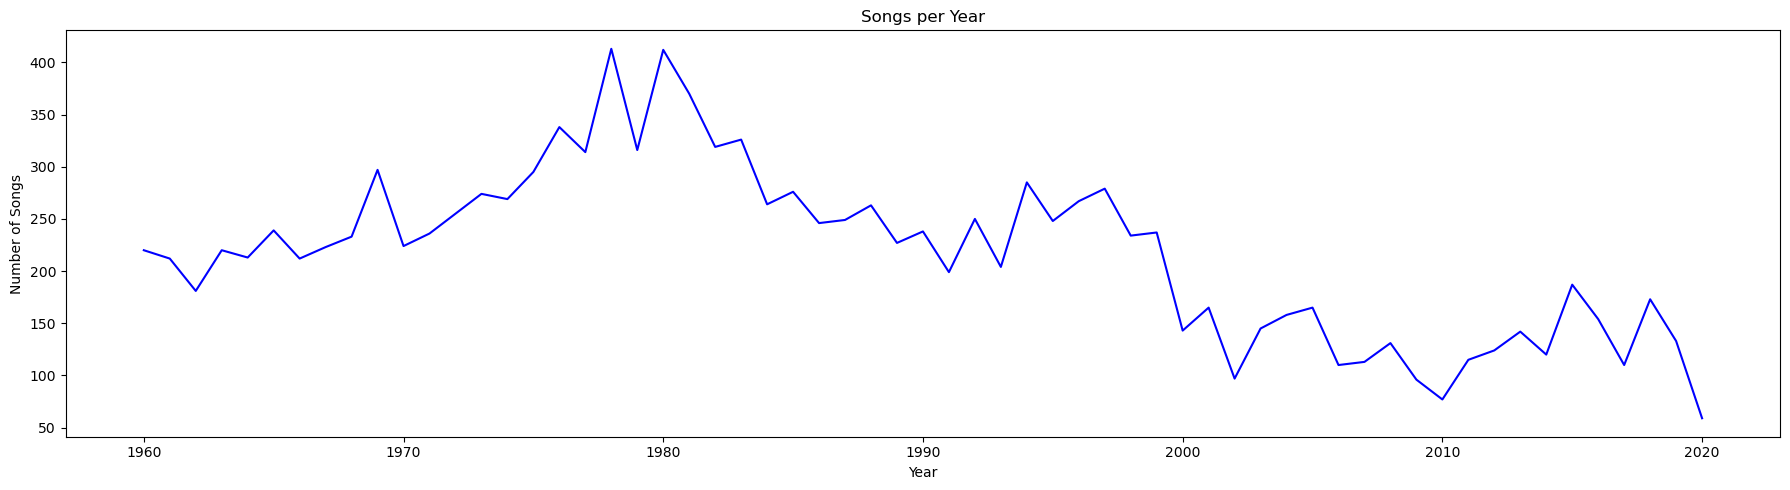

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# plotting songs count per year
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))

year_counts = df_classic_hits_clean['Year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, ax=axs, color='blue')

axs.set_title('Songs per Year')
axs.set_xlabel('Year')
axs.set_ylabel('Number of Songs')

plt.tight_layout()
plt.show()

In [61]:
# removing songs based on years:  < 1960 very few entries and >= 2020 because of probable incomplete streaming data
df_classic_hits_clean = df_classic_hits_clean[(df_classic_hits_clean['Year'] >= 1960) & (df_classic_hits_clean['Year'] <= 2020)].copy()
df_classic_hits_clean

Track          Artist      Genre  Year  \
0                    Hey Jack Kerouac  10,000 Maniacs  Alt. Rock  1987   
1                    Like the Weather  10,000 Maniacs  Alt. Rock  1987   
2             What's the Matter Here?  10,000 Maniacs  Alt. Rock  1987   
3                          Trouble Me  10,000 Maniacs  Alt. Rock  1989   
4               Candy Everybody Wants  10,000 Maniacs  Alt. Rock  1992   
...                               ...             ...        ...   ...   
15145  7 Seconds (feat. Neneh Cherry)  Youssou N'Dour      World  1994   
15146                          Birima  Youssou N'Dour      World  1995   
15147                             Set  Youssou N'Dour      World  2004   
15148                Africa Remembers  Youssou N'Dour      World  2007   
15149                       Wiri-Wiri  Youssou N'Dour      World  2007   

       Decade  Duration_min  Time_Signature  Key  Mode    Tempo  Danceability  \
0        1980      3.440217               4    6     1  132.015         0.616   
1        1980      3.944217               4    1     1  133.351         0.770   
2        1980      4.852883               4    9     1   99.978         0.593   
3        1980      3.226000               4    2     1  117.913         0.861   
4        1990      3.099333               4   10     1  104.970         0.622   
...       ...           ...             ...  ...   ...      ...           ...   
15145    1990      5.103767               4    1     0  154.171         0.679   
15146    1990      3.806217               4   10     1  105.754         0.692   
15147    2000      3.780433               4    0     1  146.213         0.733   
15148    2000      9.341100               4    5     0   97.677         0.696   
15149    2000      4.124433               4    5     1   83.013         0.654   

       Energy  Loudness  Speechiness  Acousticness  Instrumentalness  \
0       0.511   -15.894       0.0279       0.03840          0.000000   
1       0.459   -17.453       0.0416       0.11200          0.003430   
2       0.816    -7.293       0.0410       0.00449          0.000032   
3       0.385   -10.057       0.0341       0.15400          0.000000   
4       0.876    -6.310       0.0305       0.01930          0.006840   
...       ...       ...          ...           ...               ...   
15145   0.659   -10.826       0.0269       0.07710          0.000004   
15146   0.737    -7.042       0.0512       0.25400          0.017400   
15147   0.730   -11.056       0.0479       0.04240          0.000101   
15148   0.378   -16.181       0.0797       0.44400          0.019400   
15149   0.516   -10.325       0.0707       0.30400          0.000235   

       Liveness  Valence  Popularity  
0        0.1500    0.604          40  
1        0.1450    0.963          43  
2        0.0896    0.519          12  
3        0.1230    0.494          47  
4        0.0987    0.867          43  
...         ...      ...         ...  
15145    0.3160    0.528          47  
15146    0.1120    0.808          18  
15147    0.0282    0.840          25  
15148    0.0850    0.551           8  
15149    0.1100    0.259           5  

[13294 rows x 19 columns]

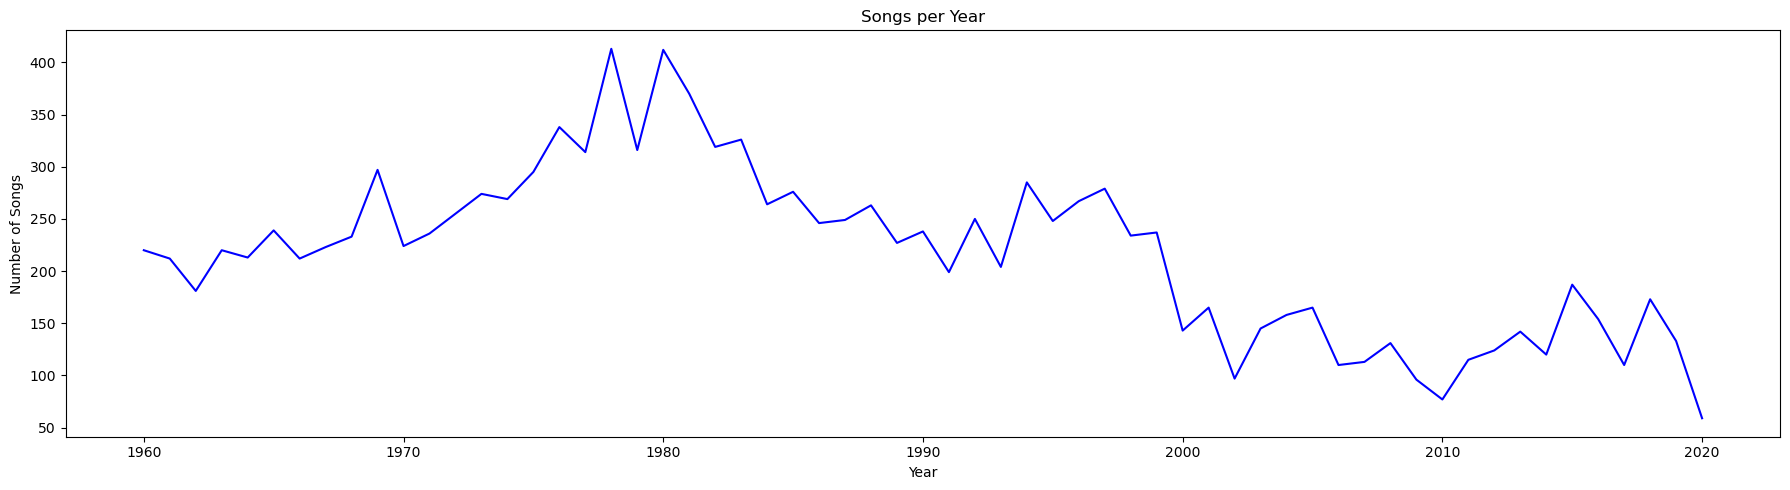

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# plotting songs count per year
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))

year_counts = df_classic_hits_clean['Year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, ax=axs, color='blue')

axs.set_title('Songs per Year')
axs.set_xlabel('Year')
axs.set_ylabel('Number of Songs')

plt.tight_layout()
plt.show()

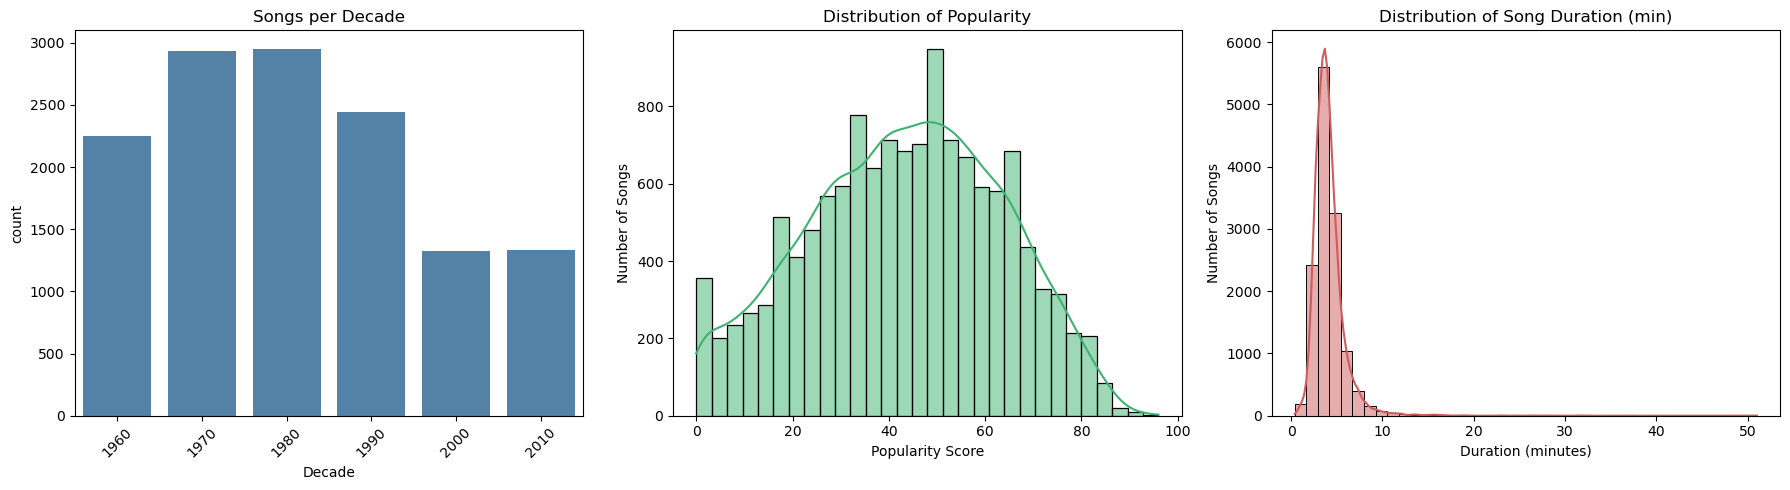

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
colors = ['steelblue', 'mediumseagreen', 'indianred']

# Decade distribution
sns.countplot(data=df_classic_hits_clean, x='Decade', color=colors[0], ax=axs[0])
axs[0].set_title('Songs per Decade')
axs[0].set_xlabel('Decade')
axs[0].tick_params(axis='x', rotation=45)

# Popularity distribution
sns.histplot(data=df_classic_hits_clean, x='Popularity', bins=30, kde=True, color=colors[1], ax=axs[1])
axs[1].set_title('Distribution of Popularity')
axs[1].set_xlabel('Popularity Score')
axs[1].set_ylabel('Number of Songs')

# Duration in minutes
sns.histplot(data=df_classic_hits_clean, x='Duration_min', bins=40, kde=True, color=colors[2], ax=axs[2])
axs[2].set_title('Distribution of Song Duration (min)')
axs[2].set_xlabel('Duration (minutes)')
axs[2].set_ylabel('Number of Songs')

plt.tight_layout()
plt.show()

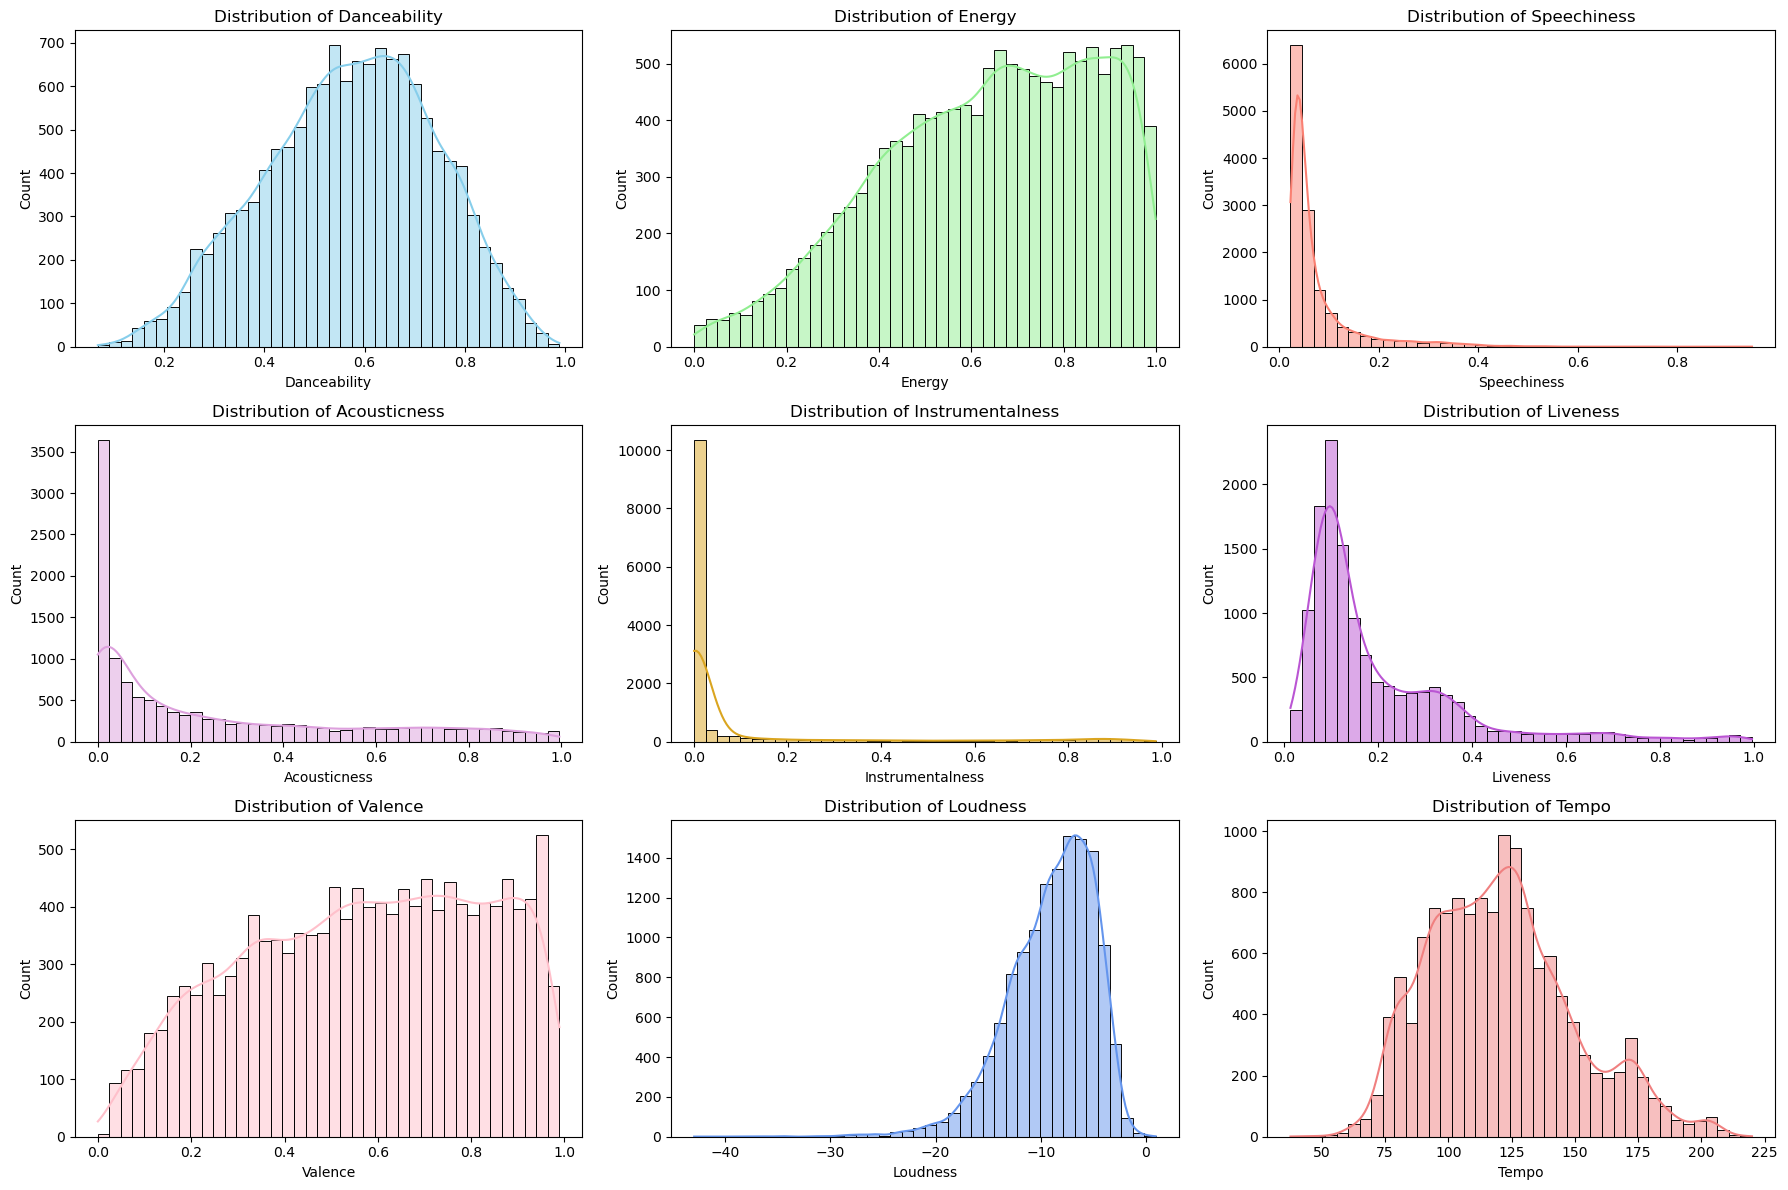

In [ ]:
# Plotting 'Danceability', 'Energy', 'Speechiness','Acousticness', 'Instrumentalness', 'Liveness','Valence', 'Loudness', 'Tempo' - distribution
features = [
    'Danceability', 'Energy', 'Speechiness',
    'Acousticness', 'Instrumentalness', 'Liveness',
    'Valence', 'Loudness', 'Tempo'
]

colors = [
    'skyblue', 'lightgreen', 'salmon',
    'plum', 'goldenrod', 'mediumorchid',
    'pink', 'cornflowerblue', 'lightcoral'
]

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axs = axs.flatten()

for i, feature in enumerate(features):
    sns.histplot(data=df_classic_hits_clean, x=feature, bins=40, kde=True, ax=axs[i], color=colors[i])
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

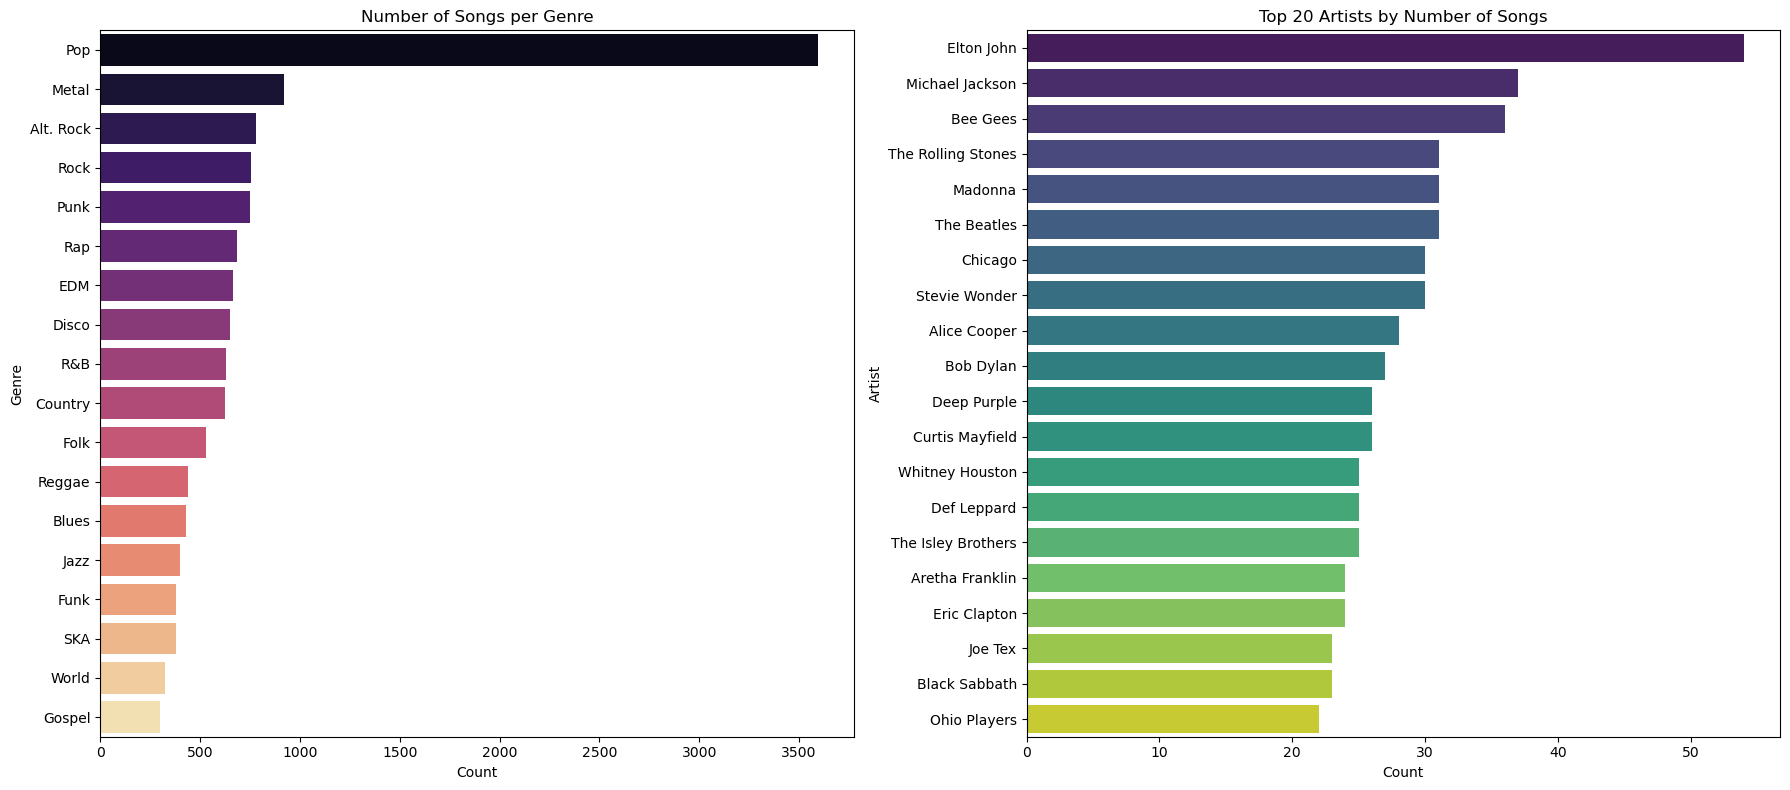

In [ ]:
# Prepare genre counts
genre_counts = df_classic_hits_clean['Genre'].value_counts()

# Prepare top 20 artists
top_artists = df_classic_hits_clean['Artist'].value_counts().head(20)

# Plot both side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Left: Genre Distribution
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, ax=axs[0], palette='magma')
axs[0].set_title('Number of Songs per Genre')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Genre')

# Right: Top 20 Artists
sns.barplot(x=top_artists.values, y=top_artists.index, hue=top_artists.index, ax=axs[1], palette='viridis')
axs[1].set_title('Top 20 Artists by Number of Songs')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Artist')

plt.tight_layout()
plt.show()

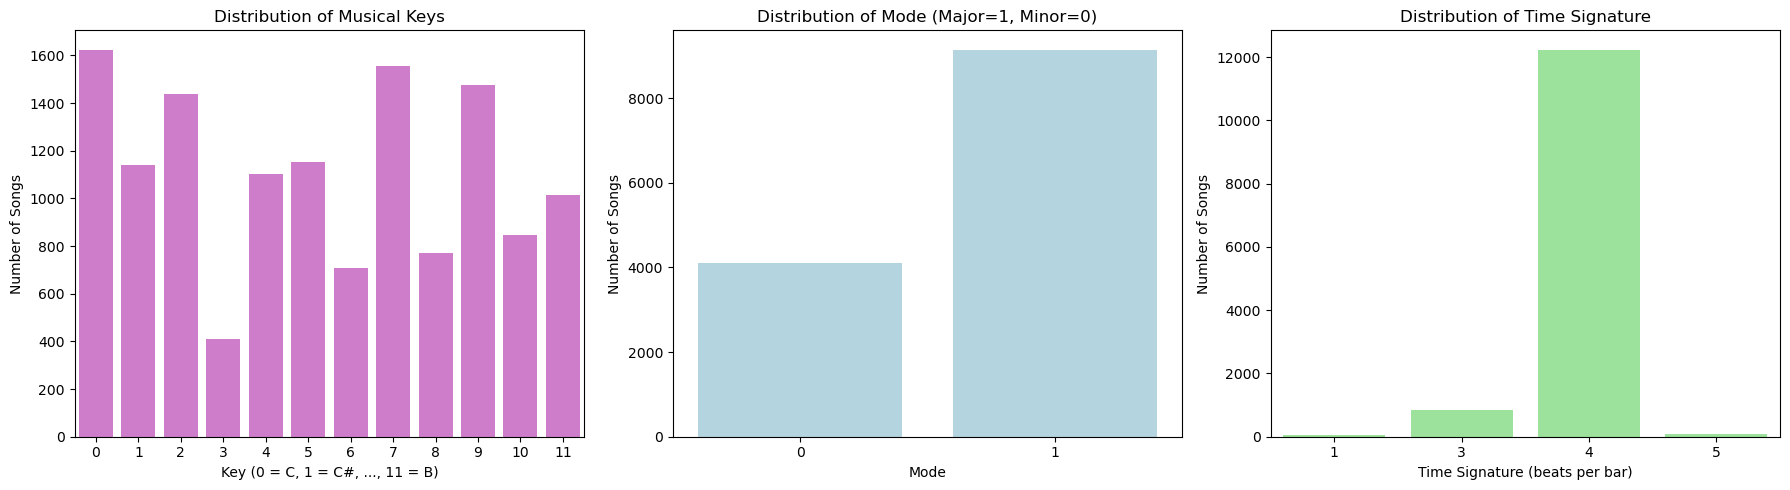

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
colors = ['orchid', 'lightblue', 'lightgreen']

# Musical Key
sns.countplot(data=df_classic_hits_clean, x='Key', ax=axs[0], color=colors[0])
axs[0].set_title('Distribution of Musical Keys')
axs[0].set_xlabel('Key (0 = C, 1 = C#, ..., 11 = B)')
axs[0].set_ylabel('Number of Songs')

# Mode (Major/Minor)
sns.countplot(data=df_classic_hits_clean, x='Mode', ax=axs[1], color=colors[1])
axs[1].set_title('Distribution of Mode (Major=1, Minor=0)')
axs[1].set_xlabel('Mode')
axs[1].set_ylabel('Number of Songs')

# Time Signature
sns.countplot(data=df_classic_hits_clean, x='Time_Signature', ax=axs[2], color=colors[2])
axs[2].set_title('Distribution of Time Signature')
axs[2].set_xlabel('Time Signature (beats per bar)')
axs[2].set_ylabel('Number of Songs')

plt.tight_layout()
plt.show()

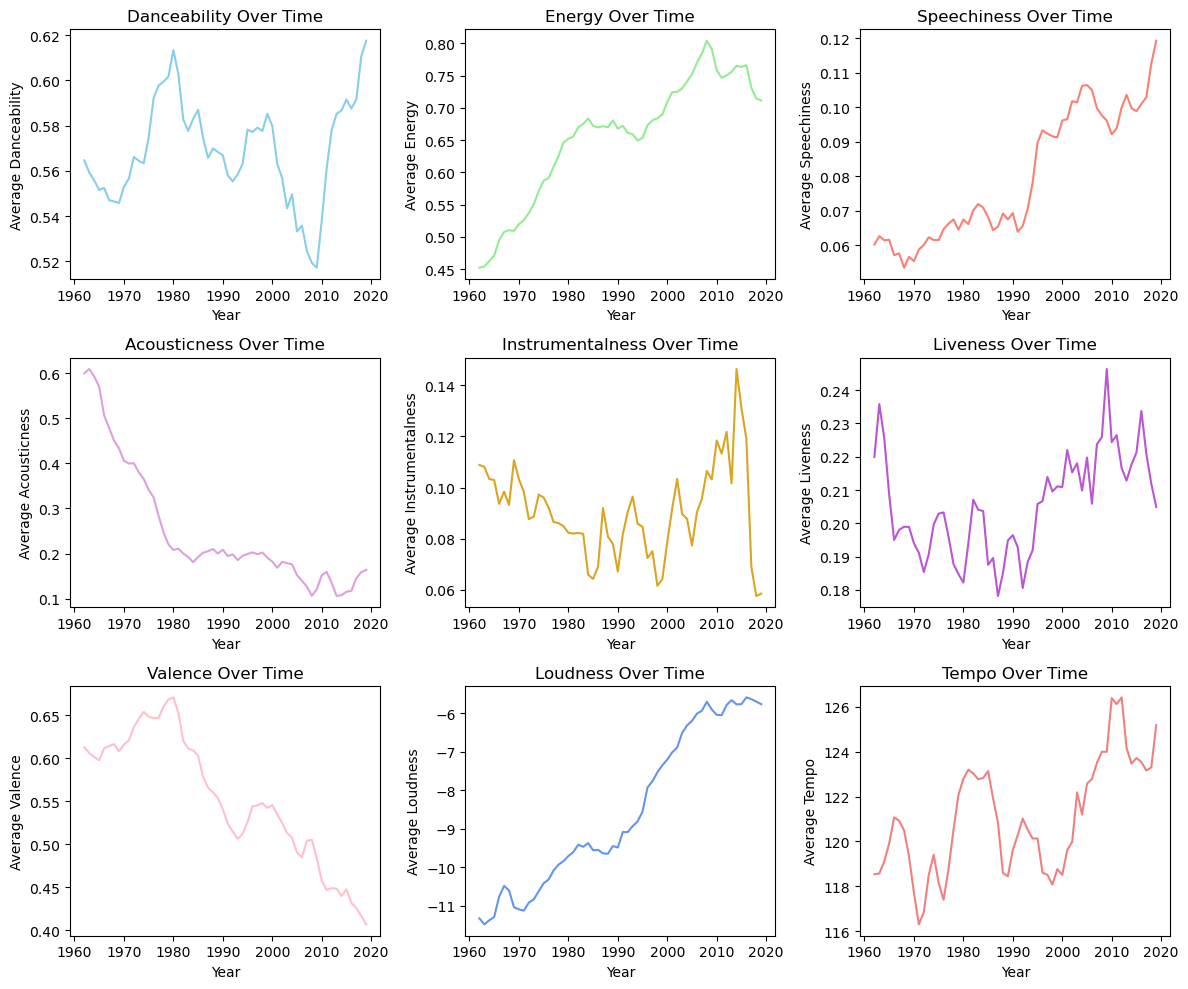

In [ ]:
# checking features over time
features = [
    'Danceability', 'Energy', 'Speechiness',
    'Acousticness', 'Instrumentalness', 'Liveness',
    'Valence', 'Loudness', 'Tempo'
]

colors = [
    'skyblue', 'lightgreen', 'salmon',
    'plum', 'goldenrod', 'mediumorchid',
    'pink', 'cornflowerblue', 'lightcoral'
]

# using moving avg to smooth out noisy line plots
# features_over_time = df_classic_hits_clean.groupby('Year')[features].mean().reset_index()
features_over_time = df_classic_hits_clean.groupby('Year')[features].mean().rolling(window=3).mean().reset_index()

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axs = axs.flatten()

for i, feature in enumerate(features):
    sns.lineplot(data=features_over_time, x='Year', y=feature, ax=axs[i], color=colors[i])
    axs[i].set_title(f'{feature} Over Time')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Average ' + feature)

plt.tight_layout()
plt.show()

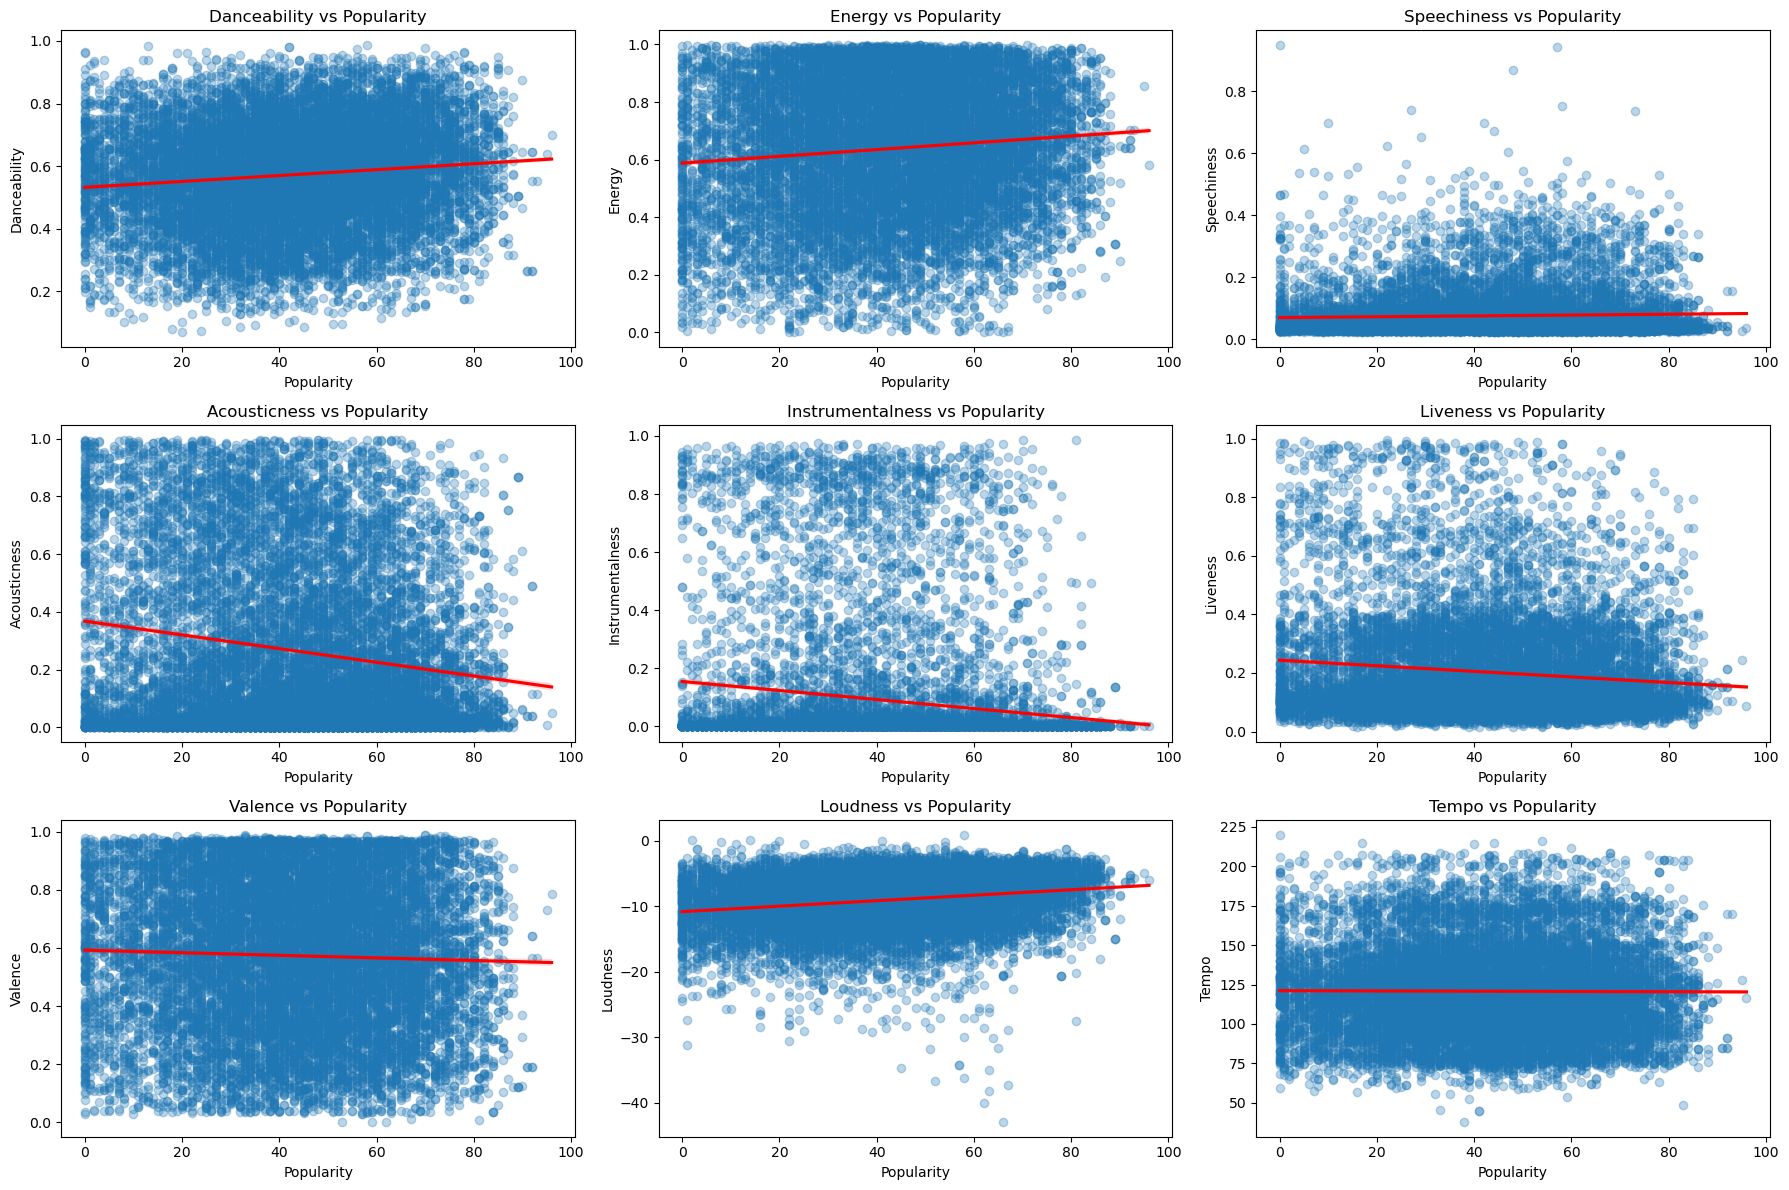

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axs = axs.flatten()

for i, feature in enumerate(features):
    sns.regplot(
        data=df_classic_hits_clean,
        x='Popularity', y=feature,  # ⬅️ FLIPPED HERE
        ax=axs[i],
        scatter_kws={'alpha': 0.3},
        line_kws={'color': 'red'}
    )
    axs[i].set_title(f'{feature} vs Popularity')  # ⬅️ Updated title
    axs[i].set_xlabel('Popularity')                # ⬅️ Updated axis label
    axs[i].set_ylabel(feature)                     # ⬅️ Updated axis label

plt.tight_layout()
plt.show()

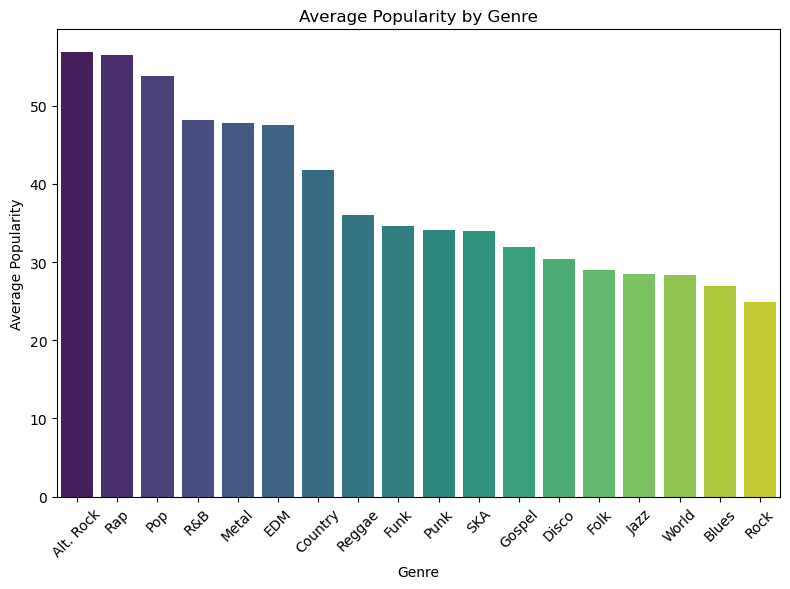

In [ ]:
# Calculate average popularity by genre
genre_popularity = df_classic_hits_clean.groupby('Genre')['Popularity'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=genre_popularity, x='Genre', y='Popularity', hue='Genre', palette='viridis', legend=False)
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


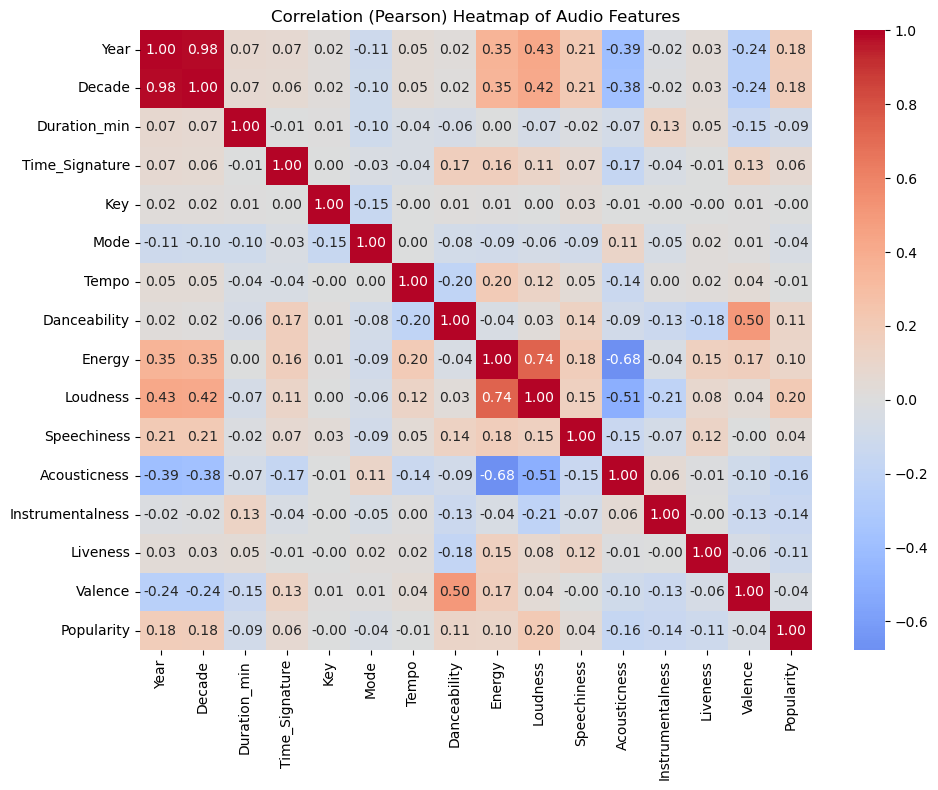

In [ ]:
# Pearson correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_classic_hits_clean.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation (Pearson) Heatmap of Audio Features')
plt.tight_layout()
plt.show()

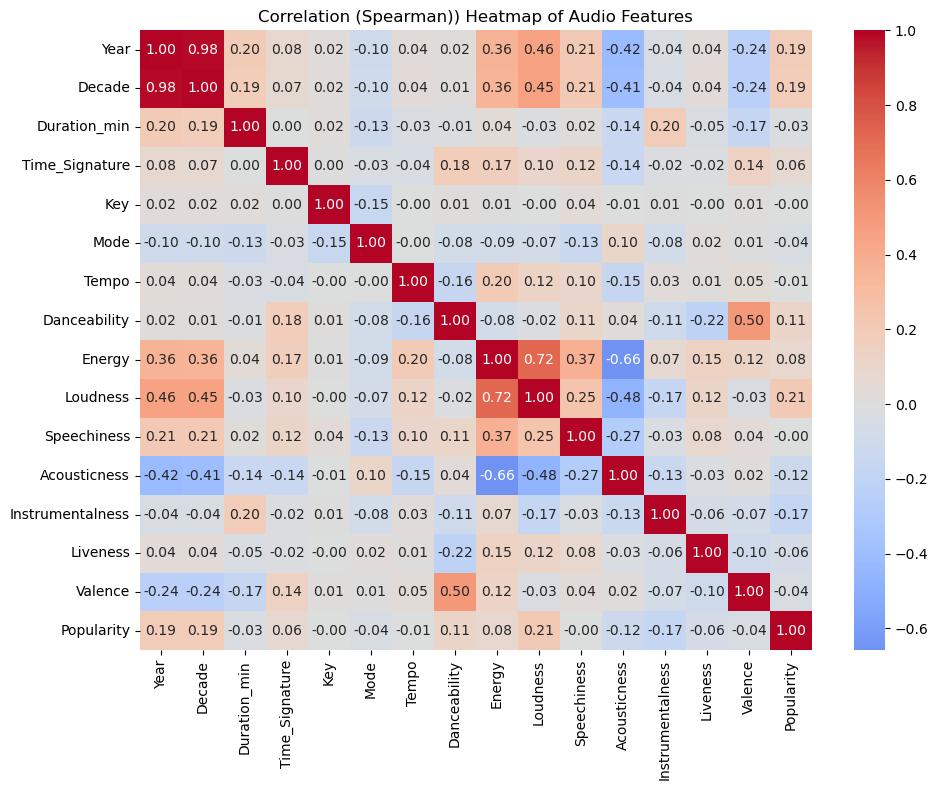

In [ ]:
# Spearman correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_classic_hits_clean.corr(method='spearman',numeric_only=True)

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation (Spearman)) Heatmap of Audio Features')
plt.tight_layout()
plt.show()

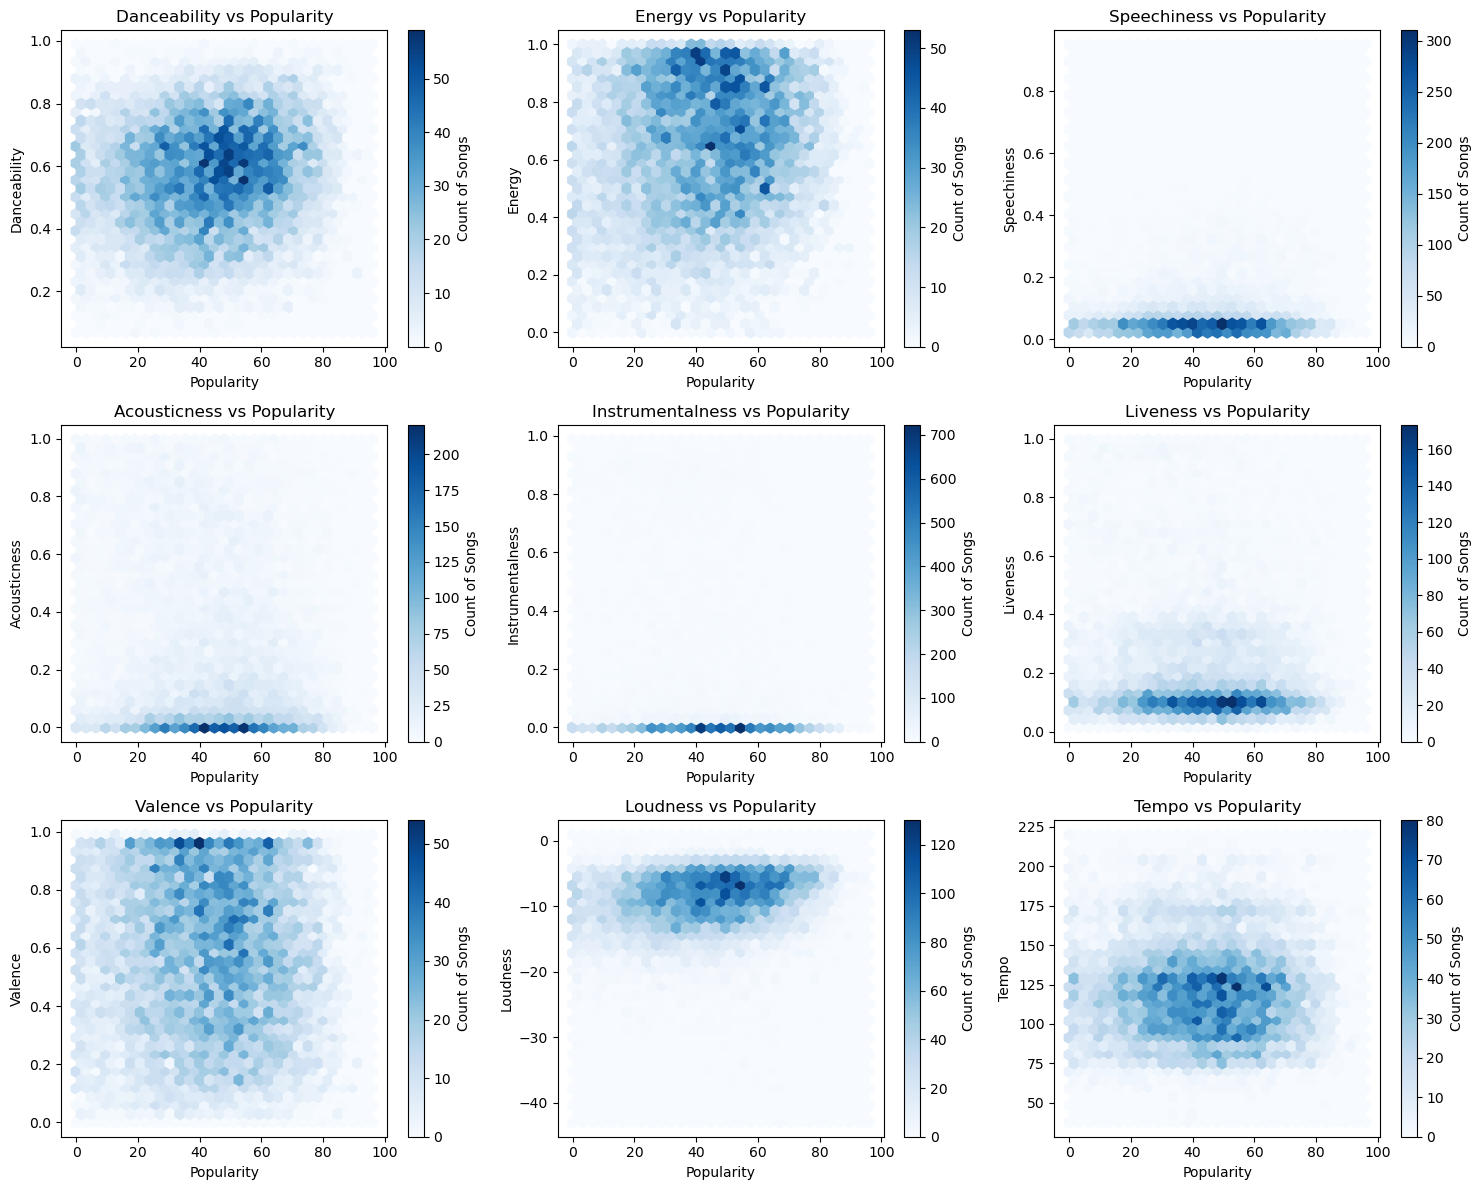

In [ ]:
import matplotlib.pyplot as plt

# List of features to compare with Popularity
features = [
    'Danceability', 'Energy', 'Speechiness', 'Acousticness', 
    'Instrumentalness', 'Liveness', 'Valence', 'Loudness', 'Tempo'
]

# Plot settings
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axs = axs.flatten()

for i, feature in enumerate(features):
    hb = axs[i].hexbin(
        x=df_classic_hits_clean['Popularity'],
        y=df_classic_hits_clean[feature],
        gridsize=30,
        cmap='Blues'
    )
    axs[i].set_title(f'{feature} vs Popularity')
    axs[i].set_xlabel('Popularity')
    axs[i].set_ylabel(feature)
    cb = fig.colorbar(hb, ax=axs[i])
    cb.set_label('Count of Songs')

plt.tight_layout()
plt.show()

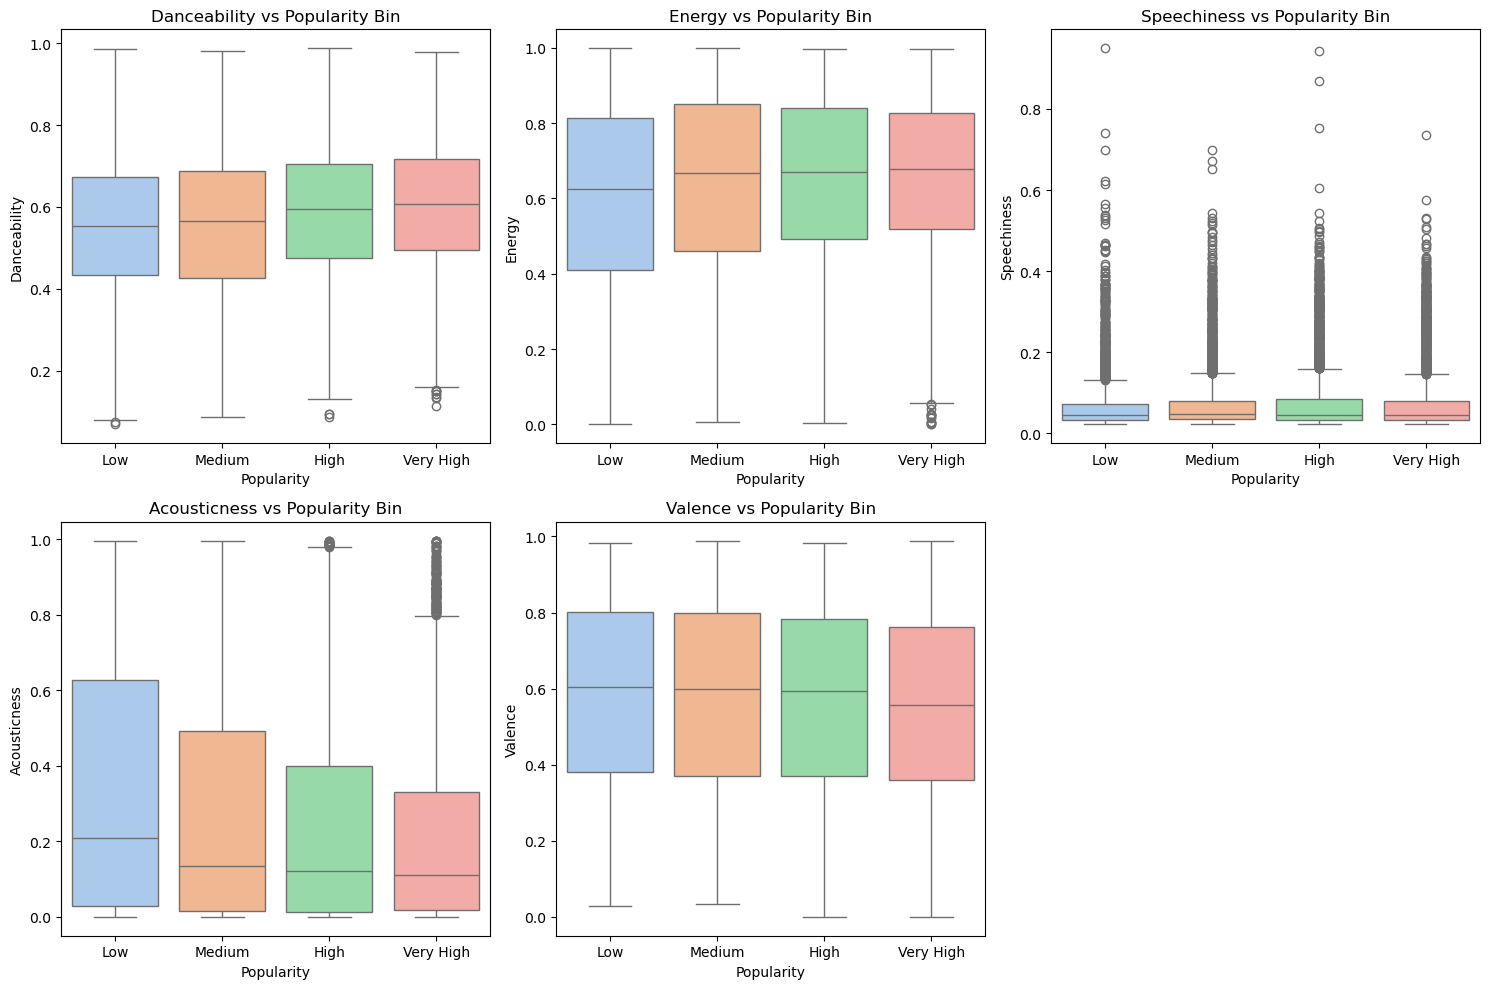

In [ ]:
# Bin popularity into quantiles
df_classic_hits_clean['Popularity_bin'] = pd.qcut(df_classic_hits_clean['Popularity'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Valence']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Popularity_bin', y=feature, hue='Popularity_bin', data=df_classic_hits_clean, 
            palette='pastel', legend=False)
    plt.title(f'{feature} vs Popularity Bin')
    plt.xlabel('Popularity')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import spearmanr

features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 
            'Instrumentalness', 'Liveness', 'Valence', 'Loudness', 'Tempo']

for feature in features:
    rho, p = spearmanr(df_classic_hits_clean[feature], df_classic_hits_clean['Popularity'])
    print(f"{feature}: Spearman rho = {rho:.3f}, p-value = {p:.3e}")

Danceability: Spearman rho = 0.114, p-value = 1.581e-39
Energy: Spearman rho = 0.082, p-value = 5.862e-21
Speechiness: Spearman rho = -0.003, p-value = 7.722e-01
Acousticness: Spearman rho = -0.119, p-value = 2.981e-43
Instrumentalness: Spearman rho = -0.169, p-value = 9.703e-86
Liveness: Spearman rho = -0.064, p-value = 2.114e-13
Valence: Spearman rho = -0.039, p-value = 6.443e-06
Loudness: Spearman rho = 0.212, p-value = 4.832e-134
Tempo: Spearman rho = -0.007, p-value = 4.079e-01


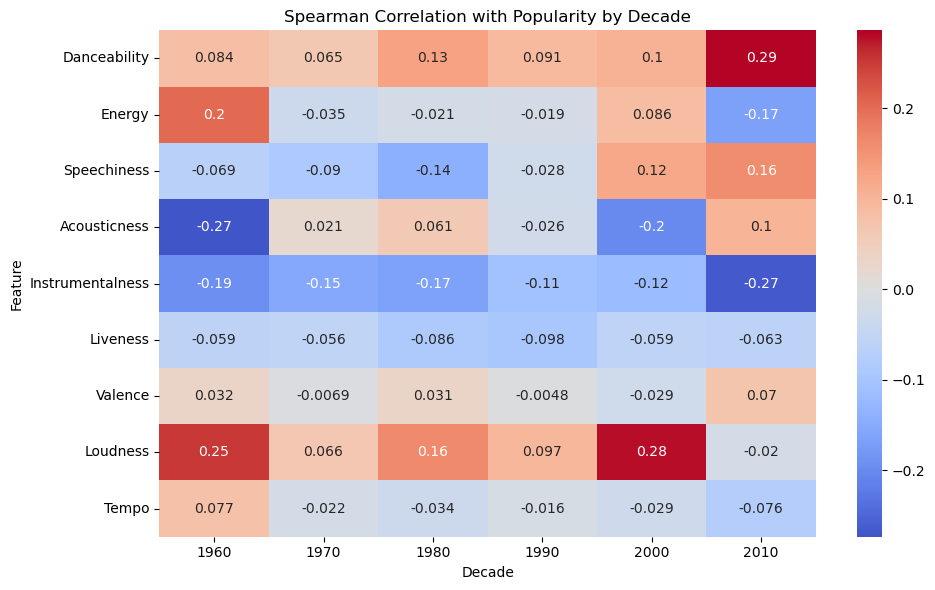

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Create a Decade column
df_classic_hits_clean['Decade'] = (df_classic_hits_clean['Year'] // 10) * 10

features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 
            'Instrumentalness', 'Liveness', 'Valence', 'Loudness', 'Tempo']

# Dictionary to store correlations
correlation_dict = {}

# Loop through each decade
for decade in sorted(df_classic_hits_clean['Decade'].unique()):
    subset = df_classic_hits_clean[df_classic_hits_clean['Decade'] == decade]
    corr_values = []
    for feature in features:
        rho, _ = spearmanr(subset[feature], subset['Popularity'])
        corr_values.append(rho)
    correlation_dict[decade] = corr_values

# Create DataFrame from results
corr_df = pd.DataFrame(correlation_dict, index=features)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation with Popularity by Decade')
plt.xlabel('Decade')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Predictive Modeling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = [
    'Danceability', 'Energy', 'Speechiness', 'Acousticness',
    'Instrumentalness', 'Liveness', 'Valence',
    'Loudness', 'Tempo', 'Duration_min'
]
target = 'Popularity'

X = df_classic_hits_clean[features]
y = df_classic_hits_clean[target]

# === Step 3: Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Step 4: Feature scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Step 5: Initialize models ===
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# === Step 6: Hyperparameter tuning where needed ===
tuned_models = {}

# Ridge tuning
ridge_grid = GridSearchCV(Ridge(), {'alpha': [0.1, 1, 10]}, cv=5, scoring='neg_mean_absolute_error')
ridge_grid.fit(X_train_scaled, y_train)
tuned_models["Ridge"] = ridge_grid.best_estimator_
print("Best Ridge Params:", ridge_grid.best_params_)

# Lasso tuning
lasso_grid = GridSearchCV(Lasso(), {'alpha': [0.001, 0.01, 0.1]}, cv=5, scoring='neg_mean_absolute_error')
lasso_grid.fit(X_train_scaled, y_train)
tuned_models["Lasso"] = lasso_grid.best_estimator_
print("Best Lasso Params:", lasso_grid.best_params_)

# Random Forest tuning
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), {
    'n_estimators': [100],
    'max_depth': [None, 10]
}, cv=5, scoring='neg_mean_absolute_error')
rf_grid.fit(X_train, y_train)
tuned_models["Random Forest"] = rf_grid.best_estimator_
print("Best Random Forest Params:", rf_grid.best_params_)

# Linear Regression (no tuning needed)
tuned_models["Linear Regression"] = LinearRegression().fit(X_train_scaled, y_train)

# === Step 7: Cross-validation + evaluation ===
results = []

for name, model in tuned_models.items():
    scaled = name in ["Linear Regression", "Ridge", "Lasso"]
    X_tr, X_te = (X_train_scaled, X_test_scaled) if scaled else (X_train, X_test)

    # Cross-validation
    cv_r2 = cross_val_score(model, X_tr, y_train, cv=5, scoring='r2')
    
    # Fit and predict
    model.fit(X_tr, y_train)
    preds = model.predict(X_te)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "Test R²": round(r2, 3),
        "CV R² (mean)": round(cv_r2.mean(), 3),
        "CV R² (std)": round(cv_r2.std(), 3)
    })

# === Step 8: Display final comparison ===
results_df = pd.DataFrame(results).sort_values(by='Test R²', ascending=False)
print("\n=== Regression Model Comparison ===\n")
print(results_df.to_string(index=False))

Best Ridge Params: {'alpha': 0.1}
Best Lasso Params: {'alpha': 0.001}
Best Random Forest Params: {'max_depth': None, 'n_estimators': 100}

=== Regression Model Comparison ===

            Model   MAE  RMSE  Test R²  CV R² (mean)  CV R² (std)
    Random Forest 14.46 18.04    0.217         0.189        0.013
            Ridge 15.91 19.41    0.094         0.099        0.004
            Lasso 15.91 19.41    0.094         0.099        0.004
Linear Regression 15.91 19.41    0.094         0.099        0.004


In [ ]:
# Extract feature importances from best Random Forest
rf_model = tuned_models["Random Forest"]
importances = rf_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n=== Random Forest Feature Importances ===\n")
print(features_df.to_string(index=False))


=== Random Forest Feature Importances ===

         Feature  Importance
        Loudness    0.134849
    Duration_min    0.115540
    Acousticness    0.105458
        Liveness    0.099691
         Valence    0.098472
    Danceability    0.096022
          Energy    0.088617
Instrumentalness    0.088144
           Tempo    0.087164
     Speechiness    0.086042


/var/folders/sy/t6c0gygs16q5l_178cfcc9000000gn/T/ipykernel_34193/2072180829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


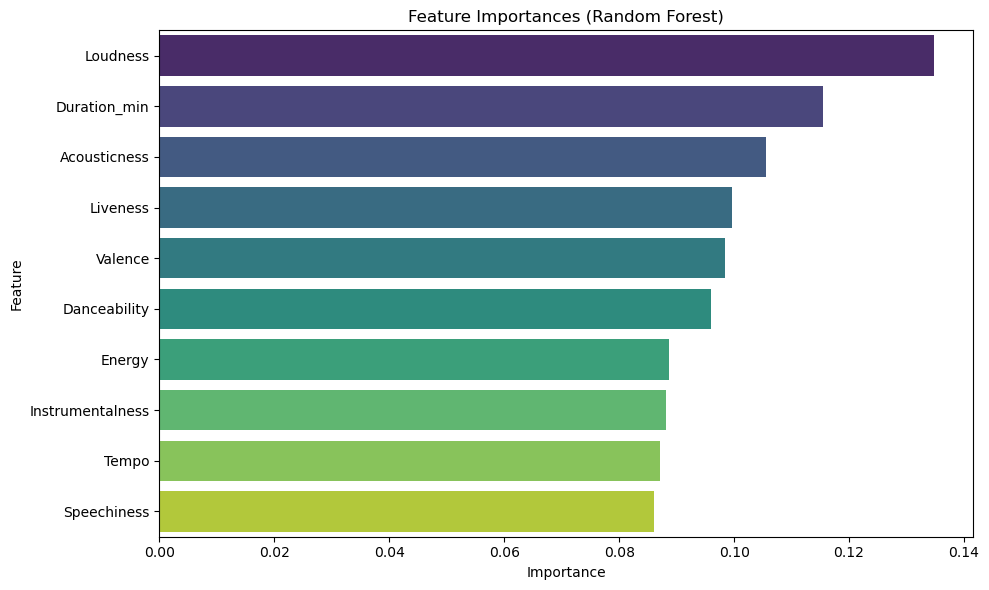

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Popularity Classification

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# === Step 1: Popularity binning ===
df_classic_hits_clean['Popularity_bin'] = pd.qcut(df_classic_hits_clean['Popularity'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# === Step 2: Feature & target setup ===
features = [
    'Danceability', 'Energy', 'Speechiness', 'Acousticness',
    'Instrumentalness', 'Liveness', 'Valence',
    'Loudness', 'Tempo', 'Duration_min'
]
X = df_classic_hits_clean[features]
y = df_classic_hits_clean['Popularity_bin']

# === Step 3: Stratified train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 4: Feature scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Step 5: Initialize models ===
models = {}
best_params = {}

# Logistic Regression + GridSearch
logreg_grid = GridSearchCV(LogisticRegression(max_iter=1000),
                           param_grid={'C': [0.1, 1, 10]},
                           cv=5, scoring='f1_macro')
logreg_grid.fit(X_train_scaled, y_train)
models['Logistic Regression'] = logreg_grid.best_estimator_
best_params['Logistic Regression'] = logreg_grid.best_params_

# Random Forest + GridSearch
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid={'n_estimators': [100],
                                   'max_depth': [None, 10]},
                       cv=5, scoring='f1_macro')
rf_grid.fit(X_train, y_train)
models['Random Forest'] = rf_grid.best_estimator_
best_params['Random Forest'] = rf_grid.best_params_

# === Step 6: Evaluation ===
results = []

for name, model in models.items():
    scaled = name in ["Logistic Regression", "SVM", "KNN"]
    X_tr = X_train_scaled if scaled else X_train
    X_te = X_test_scaled if scaled else X_test

    y_train_actual = y_train_encoded if name == "XGBoost" else y_train
    y_test_actual = y_test_encoded if name == "XGBoost" else y_test

    model.fit(X_tr, y_train_actual)
    preds = model.predict(X_te)

    if name == "XGBoost":
        preds = le.inverse_transform(preds)

    cv_acc = cross_val_score(model, X_tr, y_train_actual, cv=5, scoring='accuracy')
    cv_f1 = cross_val_score(model, X_tr, y_train_actual, cv=5, scoring='f1_macro')

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='macro')

    results.append({
        'Model': name,
        'Test Accuracy': round(acc, 3),
        'Test F1 (Macro)': round(f1, 3),
        'CV Acc (mean)': round(cv_acc.mean(), 3),
        'CV F1 (mean)': round(cv_f1.mean(), 3),
        'Best Params': best_params[name]
    })
# === Step 7: Print comparison ===
results_df = pd.DataFrame(results).sort_values(by='Test F1 (Macro)', ascending=False)
print("\n=== Classification Model Comparison ===\n")
print(results_df.to_string(index=False))

# === Step 8: Optional classification report and confusion matrix ===
print("\n=== Classification Report (Best Model) ===\n")
best_model_name = results_df.iloc[0]['Model']
final_model = models[best_model_name]
X_te_final = X_test_scaled if best_model_name == "Logistic Regression" else X_test
print(classification_report(y_test, final_model.predict(X_te_final)))


=== Classification Model Comparison ===

              Model  Test Accuracy  Test F1 (Macro)  CV Acc (mean)  CV F1 (mean)                              Best Params
      Random Forest          0.390            0.386          0.395         0.390 {'max_depth': None, 'n_estimators': 100}
Logistic Regression          0.339            0.306          0.353         0.321                               {'C': 0.1}

=== Classification Report (Best Model) ===

              precision    recall  f1-score   support

        High       0.34      0.30      0.32       697
         Low       0.40      0.42      0.41       745
      Medium       0.34      0.32      0.33       747
   Very High       0.45      0.53      0.49       717

    accuracy                           0.39      2906
   macro avg       0.38      0.39      0.39      2906
weighted avg       0.38      0.39      0.39      2906



In [ ]:
rf_model = models["Random Forest"]

In [ ]:
importances = rf_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n=== Feature Importances (Random Forest Classifier) ===\n")
print(features_df.to_string(index=False))


=== Feature Importances (Random Forest Classifier) ===

         Feature  Importance
    Acousticness    0.110930
        Loudness    0.108559
    Duration_min    0.105663
         Valence    0.101778
    Danceability    0.100536
          Energy    0.100157
        Liveness    0.097631
     Speechiness    0.096585
           Tempo    0.096261
Instrumentalness    0.081900


/var/folders/sy/t6c0gygs16q5l_178cfcc9000000gn/T/ipykernel_37384/1498305312.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='mako')


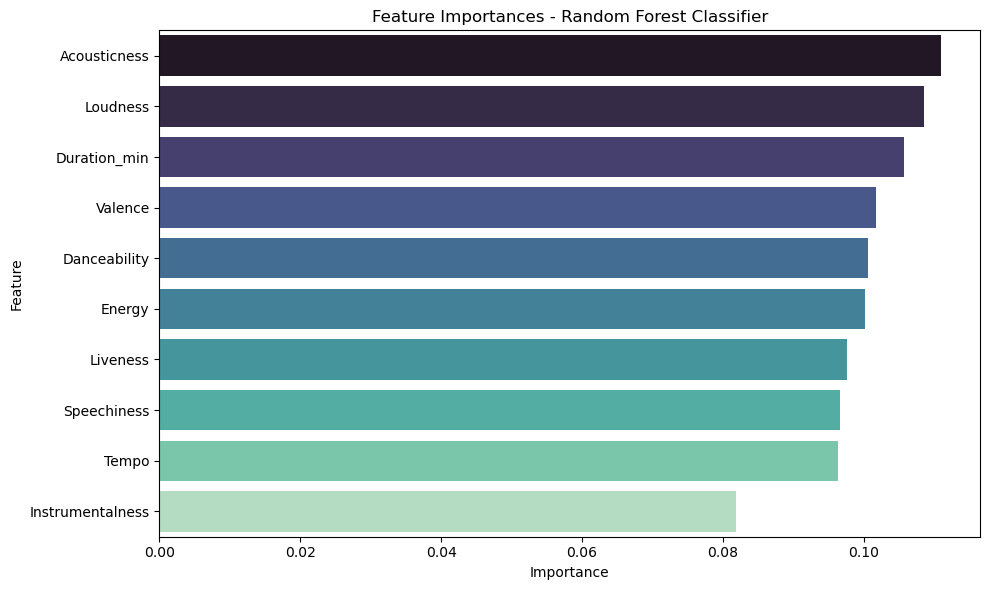

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='mako')
plt.title('Feature Importances - Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [67]:
# Encode target labels for XGBoost (needs numeric)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# === Step 1: Popularity binning ===
df = df_classic_hits_clean.copy()  # or whatever your main df is
df['Popularity_bin'] = pd.qcut(df['Popularity'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# === Step 2: Feature & target setup ===
features = [
    'Danceability', 'Energy', 'Speechiness', 'Acousticness',
    'Instrumentalness', 'Liveness', 'Valence',
    'Loudness', 'Tempo', 'Duration_min'
]
X = df[features]
y = df['Popularity_bin']

# === Step 3: Stratified train-test split ===
X_train, X_test, y_train_str, y_test_str = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 4: Scale where needed ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Step 5: Encode labels for XGBoost ===
le = LabelEncoder()
y_train = le.fit_transform(y_train_str)
y_test = le.transform(y_test_str)

# === Step 6: Define models with tuning ===
results = []

# --- SVM ---
svm_grid = GridSearchCV(SVC(), param_grid={
    'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']
}, cv=5, scoring='f1_macro')
svm_grid.fit(X_train_scaled, y_train_str)
svm_model = svm_grid.best_estimator_
svm_preds = svm_model.predict(X_test_scaled)
results.append({
    'Model': 'SVM',
    'Best Params': svm_grid.best_params_,
    'Test Accuracy': round(accuracy_score(y_test_str, svm_preds), 3),
    'Test F1 (Macro)': round(f1_score(y_test_str, svm_preds, average='macro'), 3)
})

# --- KNN ---
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid={
    'n_neighbors': [3, 5, 7, 9, 11]
}, cv=5, scoring='f1_macro')
knn_grid.fit(X_train_scaled, y_train_str)
knn_model = knn_grid.best_estimator_
knn_preds = knn_model.predict(X_test_scaled)
results.append({
    'Model': 'KNN',
    'Best Params': knn_grid.best_params_,
    'Test Accuracy': round(accuracy_score(y_test_str, knn_preds), 3),
    'Test F1 (Macro)': round(f1_score(y_test_str, knn_preds, average='macro'), 3)
})

# --- XGBoost ---
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=0),
                        param_grid={
                            'n_estimators': [100],
                            'max_depth': [3, 5, 7]
                        },
                        cv=5, scoring='f1_macro')
xgb_grid.fit(X_train, y_train)
xgb_model = xgb_grid.best_estimator_
xgb_preds_encoded = xgb_model.predict(X_test)
xgb_preds = le.inverse_transform(xgb_preds_encoded)
results.append({
    'Model': 'XGBoost',
    'Best Params': xgb_grid.best_params_,
    'Test Accuracy': round(accuracy_score(y_test_str, xgb_preds), 3),
    'Test F1 (Macro)': round(f1_score(y_test_str, xgb_preds, average='macro'), 3)
})

# === Step 7: Summary Table ===
results_df = pd.DataFrame(results).sort_values(by='Test F1 (Macro)', ascending=False)
print("\n=== Classification Results: SVM, KNN, XGBoost ===\n")
print(results_df.to_string(index=False))

# === Step 8: Classification Report for Best Model ===
best_model_name = results_df.iloc[0]['Model']
print(f"\n=== Classification Report: {best_model_name} ===\n")

if best_model_name == 'SVM':
    print(classification_report(y_test_str, svm_preds))
elif best_model_name == 'KNN':
    print(classification_report(y_test_str, knn_preds))
elif best_model_name == 'XGBoost':
    print(classification_report(y_test_str, xgb_preds))


=== Classification Results: SVM, KNN, XGBoost ===

  Model                           Best Params  Test Accuracy  Test F1 (Macro)
XGBoost {'max_depth': 5, 'n_estimators': 100}          0.373            0.370
    SVM             {'C': 1, 'kernel': 'rbf'}          0.362            0.349
    KNN                    {'n_neighbors': 7}          0.327            0.327

=== Classification Report: XGBoost ===

              precision    recall  f1-score   support

        High       0.33      0.30      0.31       653
         Low       0.38      0.40      0.39       665
      Medium       0.33      0.30      0.31       685
   Very High       0.44      0.49      0.47       656

    accuracy                           0.37      2659
   macro avg       0.37      0.37      0.37      2659
weighted avg       0.37      0.37      0.37      2659

